**Analyses entre**
* **Connectivités Fonctionnelles Spatiales Simulées ($CFS_S$)**
* **Connectivités Fonctionnelles Spatiales Empiriques ($CFS_E$)**

---
# Librairies / Dossiers

In [1]:
%pylab inline
import DB
db = DB.database()
import Tools.ext as Te
import Tools.display as Td
import Tools.matrices as Tm
import Tools.functions as Tf
cmapmax = ['RdYlGn','binary']

Populating the interactive namespace from numpy and matplotlib
61.65 GB for 19843 items


In [2]:
def corr2D(comAd, params, objet, hemi=0):
    N = len(objet)
    Ks = params.keys()
    ind = Tm.triHemi(empty((N,N)), ind=True, h=hemi)
    corr = zeros((len(params[Ks[0]]), len(params[Ks[1]])))
    for i1,p1 in enumerate(params[Ks[0]]):
        for i2,p2 in enumerate(params[Ks[1]]):
            tmp = Te.data2array('%s'.join(i for i in comAd) %(p1,p2))
            corr[i1, i2] = abs(corrcoef(tmp.take(ind), objet.take(ind))[0,1])
    return corr

def align(CO, h=1):
    mats, titls = [], []
    for t, td in zip([0,2,1,3], ['A998','B998','A66','B66']):
        mats.extend([CO[h][i][t] for i in range(6)])
        titls.extend([td + '_%i'%i for i in range(6)])
    return mats, titls

kwa = dict(labels=[r'$P$', r'$\sigma_x$'], origin='lower', interpolation='nearest', ncl=(4,6), fs=(12,6), 
           cmapmax=cmapmax, vmin=0., vmax=1., cbar=1, cbarBin=True, rotations=[45,0])

In [3]:
print db.size(name=['SC0','P_sx','FC_','998'])
print db.size(name=['SC0','P_sx','BO_','998'])
print db.size(name=['SC','P_sx','FC_A998'])

2.67 GB for 360 items
629.7 MB for 180 items
5.34 GB for 720 items


In [4]:
dir_ = "/home/golos/Main/Simulations/TcHrfDowFc"

In [15]:
ls $dir_/SC0_P_sx/CO

CO_A66_0_P_sigma2x_log.npy             CO_B66_3_P_sigma2x_SC_log.npy
CO_A66_0_P_sigma2x.npy                 CO_B66_3_P_sigma2x_SC.npy
CO_A66_0_P_sigma2x_SC.npy              CO_B66_3_P_sigma2x_uni_ant_log.npy
CO_A66_0_P_sigma2x_uni_ant.npy         CO_B66_3_P_sigma2x_uni_ant_SC_log.npy
CO_A66_0_P_sigma2x_uni_ant_SC.npy      CO_B66_3_P_sigma2x_uni_ant_SC.npy
CO_A66_0_P_sigma2x_uni_log.npy         CO_B66_3_P_sigma2x_uni_log.npy
CO_A66_0_P_sigma2x_uni.npy             CO_B66_3_P_sigma2x_uni_SC_log.npy
CO_A66_0_P_sigma2x_uni_SC.npy          CO_B66_3_P_sigma2x_uni_SC.npy
CO_A66_1_P_sigma2x.npy                 CO_B66_4_P_sigma2x_log.npy
CO_A66_1_P_sigma2x_SC.npy              CO_B66_4_P_sigma2x.npy
CO_A66_1_P_sigma2x_uni_ant_SC.npy      CO_B66_4_P_sigma2x_SC_log.npy
CO_A66_1_P_sigma2x_uni_SC.npy          CO_B66_4_P_sigma2x_SC.npy
CO_A66_2_P_sigma2x.npy                 CO_B66_4_P_sigma2x_uni_ant_log.npy
CO_A66_2_P_sigma2x_SC.npy              CO_B66_4_P_sigma2x_uni_ant_SC_log.npy
CO_A66_2_P_sigma2

In [16]:
ls $dir_/CO

CO_A66_Psi_sigmax.npy          CO_B66_Psi_sigmax.npy
CO_A66_Psi_sigmax_uni.npy      CO_B66_Psi_sigmax_uni.npy
CO_A66_sigmaA_sigmaT.npy       CO_B66_sigmaA_sigmaT.npy
CO_A66_sigmaA_sigmaT_uni.npy   CO_B66_sigmaA_sigmaT_uni.npy
CO_A66_tauT_sigmaT.npy         CO_B66_tauT_sigmaT.npy
CO_A998_Psi_sigmax.npy         CO_B998_Psi_sigmax.npy
CO_A998_Psi_sigmax_uni.npy     CO_B998_Psi_sigmax_uni.npy
CO_A998_sigmaA_sigmaT.npy      CO_B998_sigmaA_sigmaT.npy
CO_A998_sigmaA_sigmaT_uni.npy  CO_B998_sigmaA_sigmaT_uni.npy
CO_A998_tauT_sigmaT.npy        CO_B998_tauT_sigmaT.npy


# Chargement

In [77]:
CS = db.load(description='Struc')
CFSE = db.load(name=['Hag','FC'])
CFSS = db.load(name=['SC0','P_sx','FC_A998'])

53.43 MB for 14 items
45.79 MB for 12 items
1.34 GB for 180 items


In [34]:
CO_nG, CO_nL, CO_nnG, CO_nnL = [], [], [], []
SCO_nG, SCO_nL, SCO_nnG, SCO_nnL = [], [], [], []
for h in range(3):
    for CO in CO_nG, CO_nL, CO_nnG, CO_nnL, SCO_nG, SCO_nL, SCO_nnG, SCO_nnL:
        CO.append([[],[],[],[],[],[]])
    for i in range(6):
        for td in ['A998','A66','B998','B66']:
            CO_nG[h][i].append(   Te.data2array('/home/golos/Main/Simulations/TcHrfDowFc/CO/CFSS_%s_CFSE_P_sx_SC%i_h%i_NormGlobal.npy'%(td,i,h)) )
            CO_nL[h][i].append(   Te.data2array('/home/golos/Main/Simulations/TcHrfDowFc/CO/CFSS_%s_CFSE_P_sx_SC%i_h%i_NormLocal.npy'%(td,i,h)) )
            CO_nnG[h][i].append(  Te.data2array('/home/golos/Main/Simulations/TcHrfDowFc/CO/CFSS_%s_CFSE_P_sx_SC%i_h%i_NonNormGlobal.npy'%(td,i,h)) )
            CO_nnL[h][i].append(  Te.data2array('/home/golos/Main/Simulations/TcHrfDowFc/CO/CFSS_%s_CFSE_P_sx_SC%i_h%i_NonNormLocal.npy'%(td,i,h)) )
            SCO_nG[h][i].append(  Te.data2array('/home/golos/Main/Simulations/TcHrfDowFc/CO/CFSS_%s_CS_P_sx_SC%i_h%i_NormGlobal.npy'%(td,i,h)) )
            SCO_nL[h][i].append(  Te.data2array('/home/golos/Main/Simulations/TcHrfDowFc/CO/CFSS_%s_CS_P_sx_SC%i_h%i_NormLocal.npy'%(td,i,h)) )
            SCO_nnG[h][i].append( Te.data2array('/home/golos/Main/Simulations/TcHrfDowFc/CO/CFSS_%s_CS_P_sx_SC%i_h%i_NonNormGlobal.npy'%(td,i,h)) )
            SCO_nnL[h][i].append( Te.data2array('/home/golos/Main/Simulations/TcHrfDowFc/CO/CFSS_%s_CS_P_sx_SC%i_h%i_NonNormLocal.npy'%(td,i,h)) )

# Normalisé et Global (AT°)

**Les paramètres sont totalements différents !!!**
* **$G=60$**
* **$\tau_{\theta}=15$**
* **$\sigma_{\theta}=0.24$**

In [64]:
CO_nG = [[],[],[]]
typ = 'SC%i_P_sx' # i_P_sx i_local
rmBeg = None #-2
print db.commonAdress(name=['FC_','A998',typ%0], rmBeg=rmBeg)
for h in range(3):
    for i in range(6):
        params = Te.findParameters(dir_+ '/%s/FC_998'%typ%i); 
        CO_nG[h].append(array(
                [corr2D(db.commonAdress(name=['FC_','A998',typ%i], rmBeg=rmBeg), params, CFSE['FC_Hag_998_%i'%i], hemi=h).T,
                 corr2D(db.commonAdress(name=['FC_','A66', typ%i], rmBeg=rmBeg), params, CFSE['FC_Hag_66_%i'%i], hemi=h).T,
                 corr2D(db.commonAdress(name=['FC_','B998',typ%i], rmBeg=rmBeg), params, CFSE['FC_Hag_998_%i'%i], hemi=h).T,
                 corr2D(db.commonAdress(name=['FC_','B66', typ%i], rmBeg=rmBeg), params, CFSE['FC_Hag_66_%i'%i], hemi=h).T]) )

['/home/golos/Main/Simulations/TcHrfDowFc/SC0_P_sx/FC_998/FC_A998_P_', '_sigma2x_', '.npy']


In [78]:
SCO_nG = [[],[],[]]
typ = 'SC%i_P_sx' # i_P_sx i_local
rmBeg = None #-2
print db.commonAdress(name=['FC_','A998',typ%0], rmBeg=rmBeg)
for h in range(3):
    for i in range(6):
        params = Te.findParameters(dir_+ '/%s/FC_998'%typ%i); 
        SCO_nG[h].append(array(
                [corr2D(db.commonAdress(name=['FC_','A998',typ%i], rmBeg=rmBeg), params, CS['SC_Hag_998_%i'%i], hemi=h).T,
                 corr2D(db.commonAdress(name=['FC_','A66', typ%i], rmBeg=rmBeg), params, CS['SC_Hag_66_%i'%i], hemi=h).T,
                 corr2D(db.commonAdress(name=['FC_','B998',typ%i], rmBeg=rmBeg), params, CS['SC_Hag_998_%i'%i], hemi=h).T,
                 corr2D(db.commonAdress(name=['FC_','B66', typ%i], rmBeg=rmBeg), params, CS['SC_Hag_66_%i'%i], hemi=h).T]) )

['/home/golos/Main/Simulations/TcHrfDowFc/SC0_P_sx/FC_998/FC_A998_P_', '_sigma2x_', '.npy']


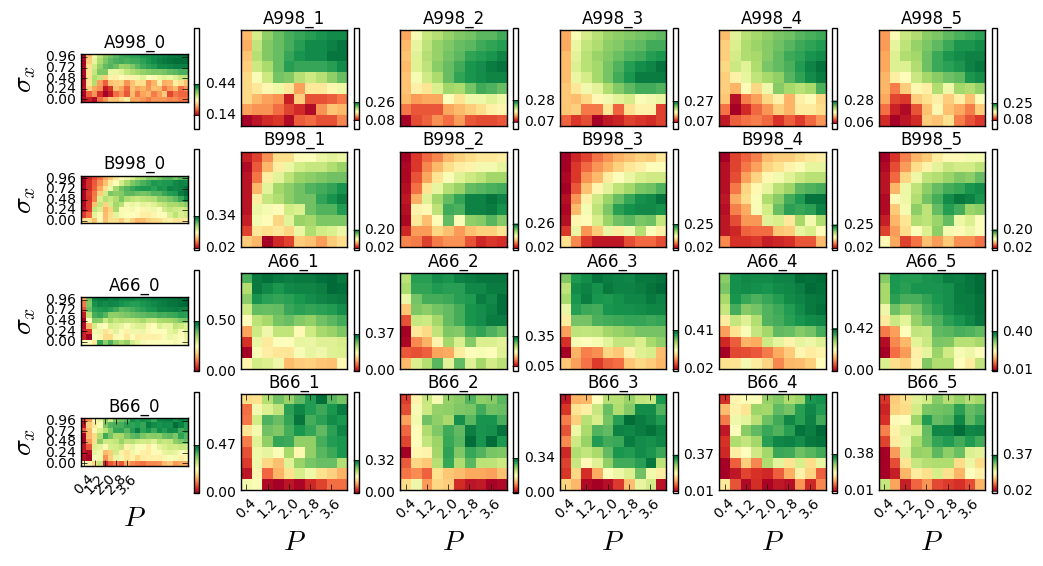

In [132]:
h, typ = 1, 'SC%i_P_sx'%1
params = Te.findParameters(dir_+ '/%s/FC_998'%typ)
params['P'] = [p[:-1] for p in params['P']]
Td.mapMatrices(*align(CO_nG, h), lxy=[params[params.keys()[i]] for i in [0,1]], **kwa)

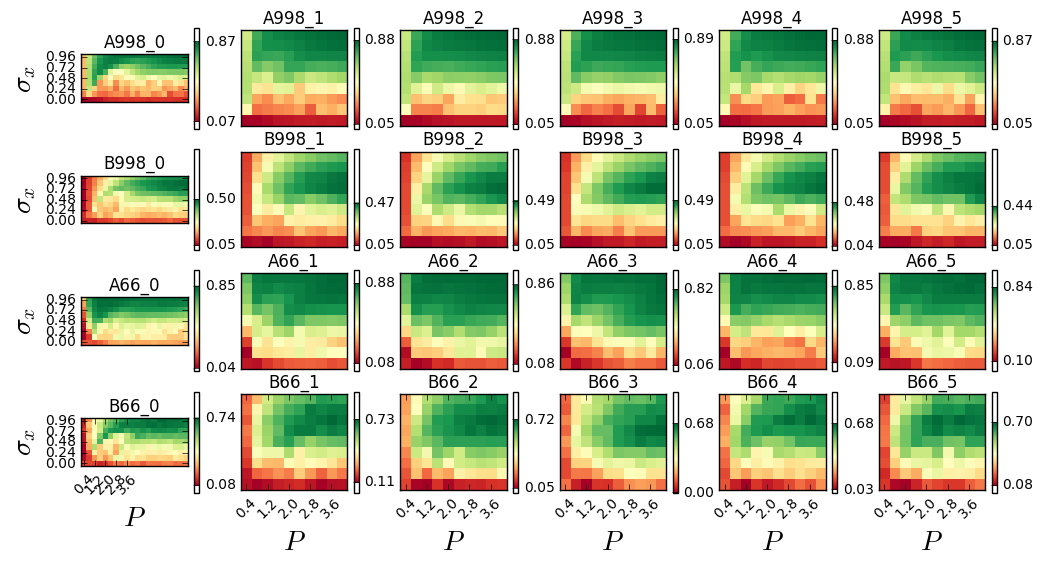

In [133]:
h, typ = 1, 'SC%i_P_sx'%1
params = Te.findParameters(dir_+ '/%s/FC_998'%typ)
params['P'] = [p[:-1] for p in params['P']]
Td.mapMatrices(*align(SCO_nG, h), lxy=[params[params.keys()[i]] for i in [0,1]], **kwa)

# Normalisé et Localisé

* $G=900$
* $\tau_{\theta}=8$
* $\sigma_{\theta}=0.4$

In [66]:
CO_nL = [[],[],[]]
typ = 'SC%i_local' # i_P_sx i_local
rmBeg = None #-2
print db.commonAdress(name=['FC_','A998',typ%0], rmBeg=rmBeg)
for h in range(3):
    for i in range(6):
        params = Te.findParameters(dir_+ '/%s/FC_998'%typ%i); 
        CO_nL[h].append(array(
                [corr2D(db.commonAdress(name=['FC_','A998',typ%i], rmBeg=rmBeg), params, CFSE['FC_Hag_998_%i'%i], hemi=h).T,
                 corr2D(db.commonAdress(name=['FC_','A66', typ%i], rmBeg=rmBeg), params, CFSE['FC_Hag_66_%i'%i], hemi=h).T,
                 corr2D(db.commonAdress(name=['FC_','B998',typ%i], rmBeg=rmBeg), params, CFSE['FC_Hag_998_%i'%i], hemi=h).T,
                 corr2D(db.commonAdress(name=['FC_','B66', typ%i], rmBeg=rmBeg), params, CFSE['FC_Hag_66_%i'%i], hemi=h).T]) )

['/home/golos/Main/Simulations/TcHrfDowFc/SC0_local/FC_998/FC_A998_P_', '_sigma2x_', '.npy']


In [79]:
SCO_nL = [[],[],[]]
typ = 'SC%i_local' # i_P_sx i_local
rmBeg = None #-2
print db.commonAdress(name=['FC_','A998',typ%0], rmBeg=rmBeg)
for h in range(3):
    for i in range(6):
        params = Te.findParameters(dir_+ '/%s/FC_998'%typ%i); 
        SCO_nL[h].append(array(
                [corr2D(db.commonAdress(name=['FC_','A998',typ%i], rmBeg=rmBeg), params, CS['SC_Hag_998_%i'%i], hemi=h).T,
                 corr2D(db.commonAdress(name=['FC_','A66', typ%i], rmBeg=rmBeg), params, CS['SC_Hag_66_%i'%i], hemi=h).T,
                 corr2D(db.commonAdress(name=['FC_','B998',typ%i], rmBeg=rmBeg), params, CS['SC_Hag_998_%i'%i], hemi=h).T,
                 corr2D(db.commonAdress(name=['FC_','B66', typ%i], rmBeg=rmBeg), params, CS['SC_Hag_66_%i'%i], hemi=h).T]) )

['/home/golos/Main/Simulations/TcHrfDowFc/SC0_local/FC_998/FC_A998_P_', '_sigma2x_', '.npy']


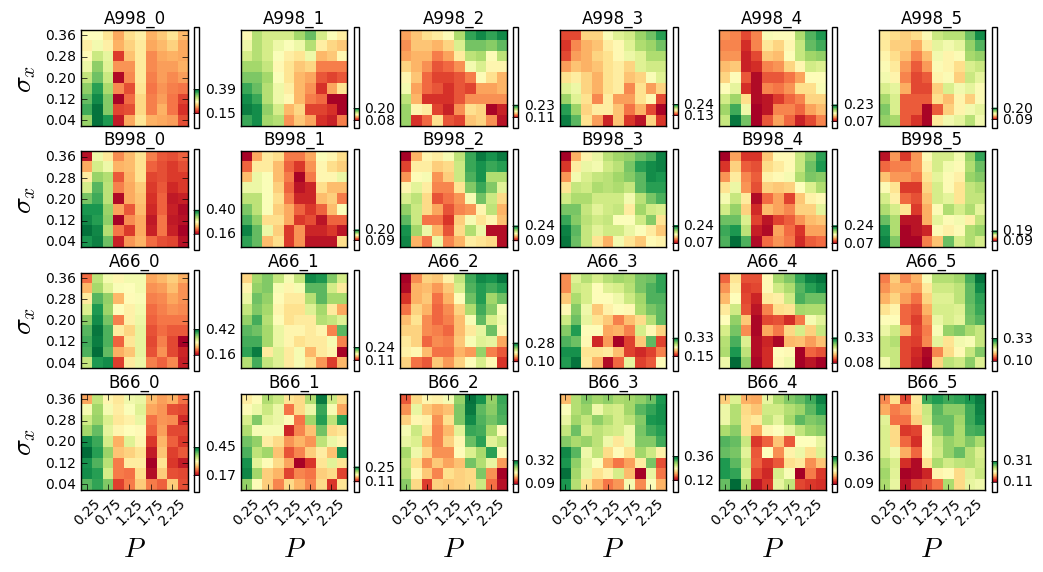

In [134]:
h, typ = 1, 'SC%i_local'%1
params = Te.findParameters(dir_+ '/%s/FC_998'%typ)
Td.mapMatrices(*align(CO_nL, h), lxy=[params[params.keys()[i]] for i in [0,1]], **kwa)

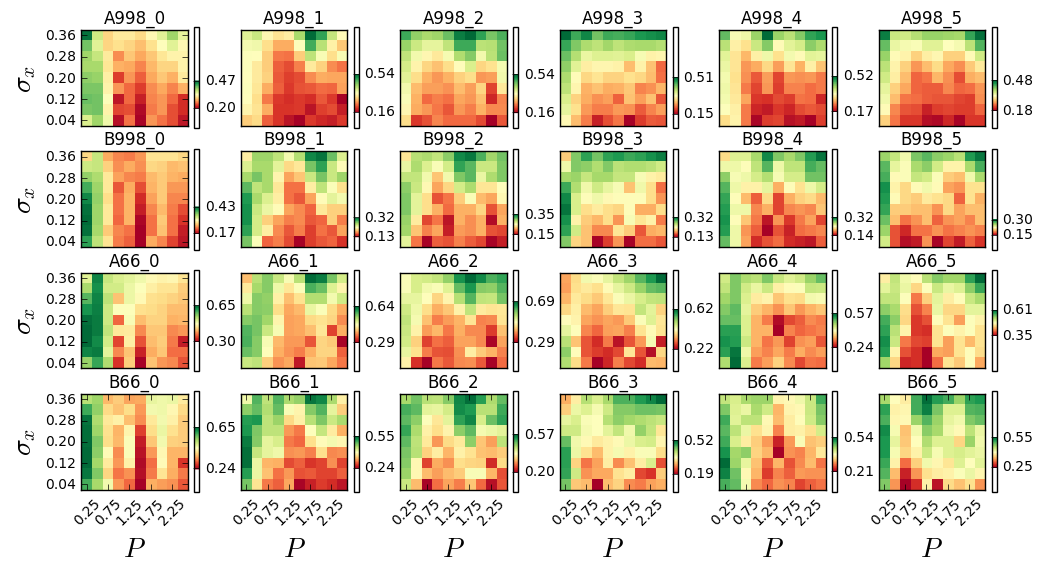

In [130]:
h, typ = 1, 'SC%i_local'%1
params = Te.findParameters(dir_+ '/%s/FC_998'%typ)
Td.mapMatrices(*align(SCO_nL, h), lxy=[params[params.keys()[i]] for i in [0,1]], **kwa)

# Non-Normalisé et Global

* $G=900$
* $\tau_{\theta}=8$
* $\sigma_{\theta}=0.4$

In [67]:
CO_nnG = [[],[],[]]
typ = 'uN_%i_P_sx' # i_P_sx i_local
rmBeg = None #-2
print db.commonAdress(name=['FC_','A998',typ%0], rmBeg=rmBeg)
for h in range(3):
    for i in range(6):
        params = Te.findParameters(dir_+ '/%s/FC_998'%typ%i); 
        try:    params['sigma2x'].remove('0.00')
        except: pass
        CO_nnG[h].append(array(
                [corr2D(db.commonAdress(name=['FC_','A998',typ%i], rmBeg=rmBeg), params, CFSE['FC_Hag_998_%i'%i], hemi=h).T,
                 corr2D(db.commonAdress(name=['FC_','A66', typ%i], rmBeg=rmBeg), params, CFSE['FC_Hag_66_%i'%i], hemi=h).T,
                 corr2D(db.commonAdress(name=['FC_','B998',typ%i], rmBeg=rmBeg), params, CFSE['FC_Hag_998_%i'%i], hemi=h).T,
                 corr2D(db.commonAdress(name=['FC_','B66', typ%i], rmBeg=rmBeg), params, CFSE['FC_Hag_66_%i'%i], hemi=h).T]) )

['/home/golos/Main/Simulations/TcHrfDowFc/uN_0_P_sx/FC_998/FC_A998_P_', '_sigma2x_', '.npy']


In [80]:
SCO_nnG = [[],[],[]]
typ = 'uN_%i_P_sx' # i_P_sx i_local
rmBeg = None #-2
print db.commonAdress(name=['FC_','A998',typ%0], rmBeg=rmBeg)
for h in range(3):
    for i in range(6):
        params = Te.findParameters(dir_+ '/%s/FC_998'%typ%i); 
        try:    params['sigma2x'].remove('0.00')
        except: pass
        SCO_nnG[h].append(array(
                [corr2D(db.commonAdress(name=['FC_','A998',typ%i], rmBeg=rmBeg), params, CS['SC_Hag_998_%i'%i], hemi=h).T,
                 corr2D(db.commonAdress(name=['FC_','A66', typ%i], rmBeg=rmBeg), params, CS['SC_Hag_66_%i'%i], hemi=h).T,
                 corr2D(db.commonAdress(name=['FC_','B998',typ%i], rmBeg=rmBeg), params, CS['SC_Hag_998_%i'%i], hemi=h).T,
                 corr2D(db.commonAdress(name=['FC_','B66', typ%i], rmBeg=rmBeg), params, CS['SC_Hag_66_%i'%i], hemi=h).T]) )

['/home/golos/Main/Simulations/TcHrfDowFc/uN_0_P_sx/FC_998/FC_A998_P_', '_sigma2x_', '.npy']


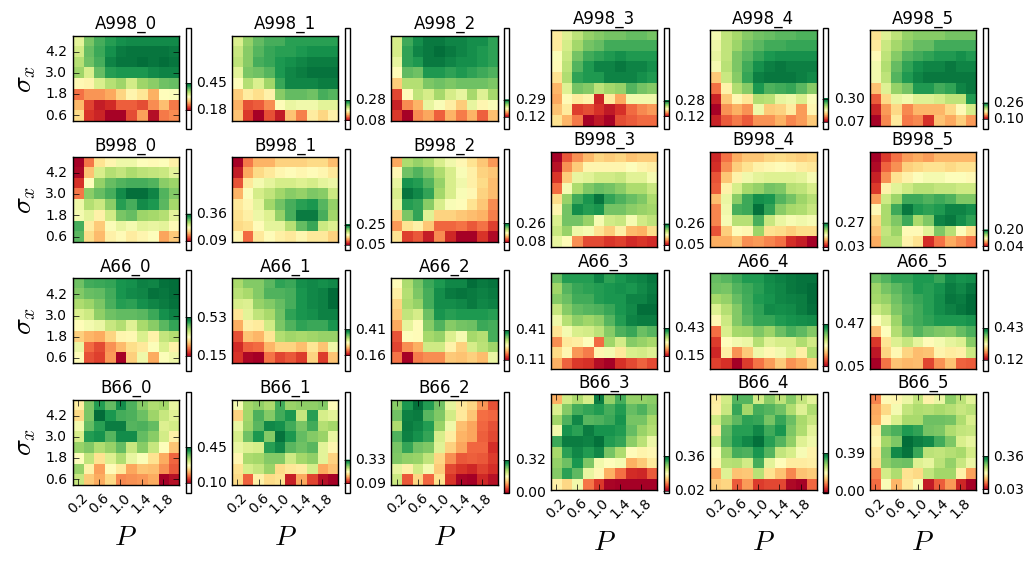

In [135]:
h, typ = 1, 'uN_%i_P_sx'%1
params = Te.findParameters(dir_+ '/%s/FC_998'%typ)
params['P'] = [p[:-1] for p in params['P']]
params['sigma2x'] = [p[:-1] for p in params['sigma2x']]
Td.mapMatrices(*align(CO_nnG, h), lxy=[params[params.keys()[i]] for i in [0,1]], **kwa)

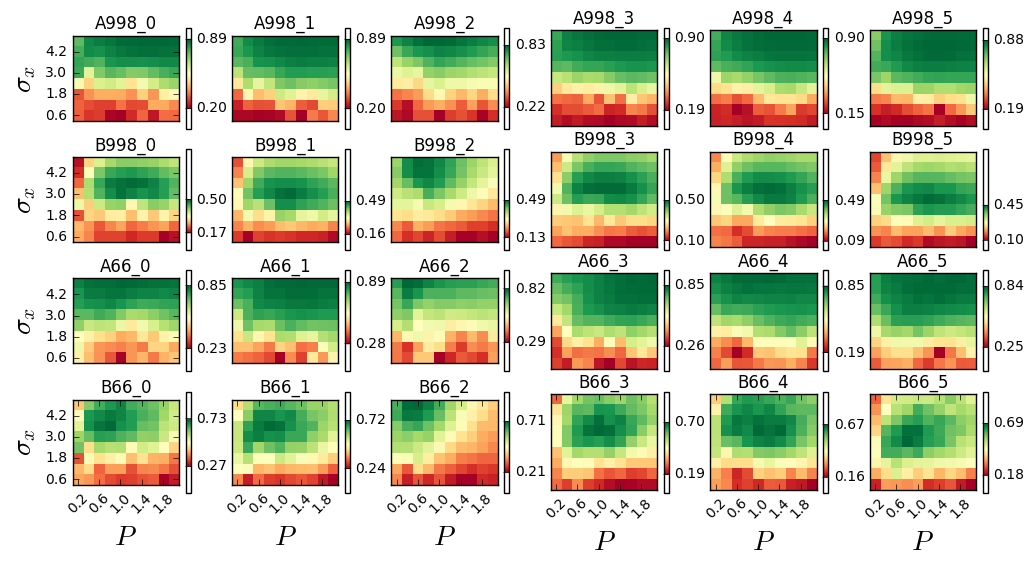

In [137]:
h, typ = 1, 'uN_%i_P_sx'%1
params = Te.findParameters(dir_+ '/%s/FC_998'%typ)
params['P'] = [p[:-1] for p in params['P']]
params['sigma2x'] = [p[:-1] for p in params['sigma2x']]
Td.mapMatrices(*align(SCO_nnG, h), lxy=[params[params.keys()[i]] for i in [0,1]], **kwa)

# Non-Normalisé et Localisé

* $G=900$
* $\tau_{\theta}=8$
* $\sigma_{\theta}=0.4$

In [69]:
CO_nnL = [[],[],[]]
typ = 'uN_%i_local' # i_P_sx i_local
rmBeg = -2
print db.commonAdress(name=['FC_','A998',typ%0], rmBeg=rmBeg)
for h in range(3):
    for i in range(6):
        params = Te.findParameters(dir_+ '/%s/FC_998'%typ%i); 
        CO_nnL[h].append(array( 
                [corr2D(db.commonAdress(name=['FC_','A998',typ%i], rmBeg=rmBeg), params, CFSE['FC_Hag_998_%i'%i], hemi=h).T,
                 corr2D(db.commonAdress(name=['FC_','A66', typ%i], rmBeg=rmBeg), params, CFSE['FC_Hag_66_%i'%i], hemi=h).T,
                 corr2D(db.commonAdress(name=['FC_','B998',typ%i], rmBeg=rmBeg), params, CFSE['FC_Hag_998_%i'%i], hemi=h).T,
                 corr2D(db.commonAdress(name=['FC_','B66', typ%i], rmBeg=rmBeg), params, CFSE['FC_Hag_66_%i'%i], hemi=h).T]) )

['/home/golos/Main/Simulations/TcHrfDowFc/uN_0_local/FC_998/FC_A998_P_', '_sigma2x_', '.npy']


In [81]:
SCO_nnL = [[],[],[]]
typ = 'uN_%i_local' # i_P_sx i_local
rmBeg = -2
print db.commonAdress(name=['FC_','A998',typ%0], rmBeg=rmBeg)
for h in range(3):
    for i in range(6):
        params = Te.findParameters(dir_+ '/%s/FC_998'%typ%i); 
        SCO_nnL[h].append(array( 
                [corr2D(db.commonAdress(name=['FC_','A998',typ%i], rmBeg=rmBeg), params, CS['SC_Hag_998_%i'%i], hemi=h).T,
                 corr2D(db.commonAdress(name=['FC_','A66', typ%i], rmBeg=rmBeg), params, CS['SC_Hag_66_%i'%i], hemi=h).T,
                 corr2D(db.commonAdress(name=['FC_','B998',typ%i], rmBeg=rmBeg), params, CS['SC_Hag_998_%i'%i], hemi=h).T,
                 corr2D(db.commonAdress(name=['FC_','B66', typ%i], rmBeg=rmBeg), params, CS['SC_Hag_66_%i'%i], hemi=h).T]) )

['/home/golos/Main/Simulations/TcHrfDowFc/uN_0_local/FC_998/FC_A998_P_', '_sigma2x_', '.npy']


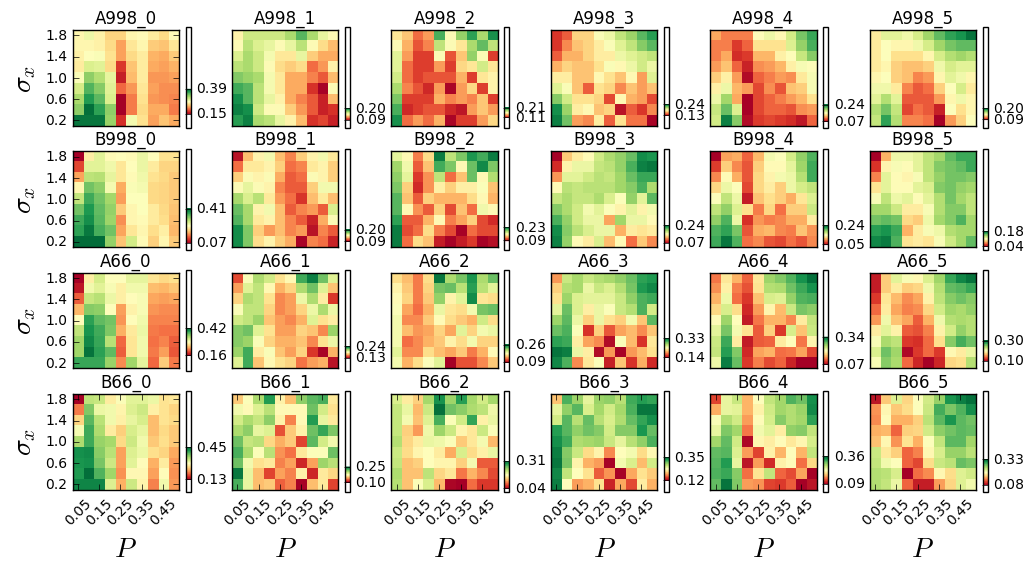

In [136]:
h, typ = 1, 'uN_%i_local'%1
params = Te.findParameters(dir_+ '/%s/FC_998'%typ)
params['sigma2x'] = [p[:-1] for p in params['sigma2x']]
Td.mapMatrices(*align(CO_nnL, h), lxy=[params[params.keys()[i]] for i in [0,1]], **kwa)

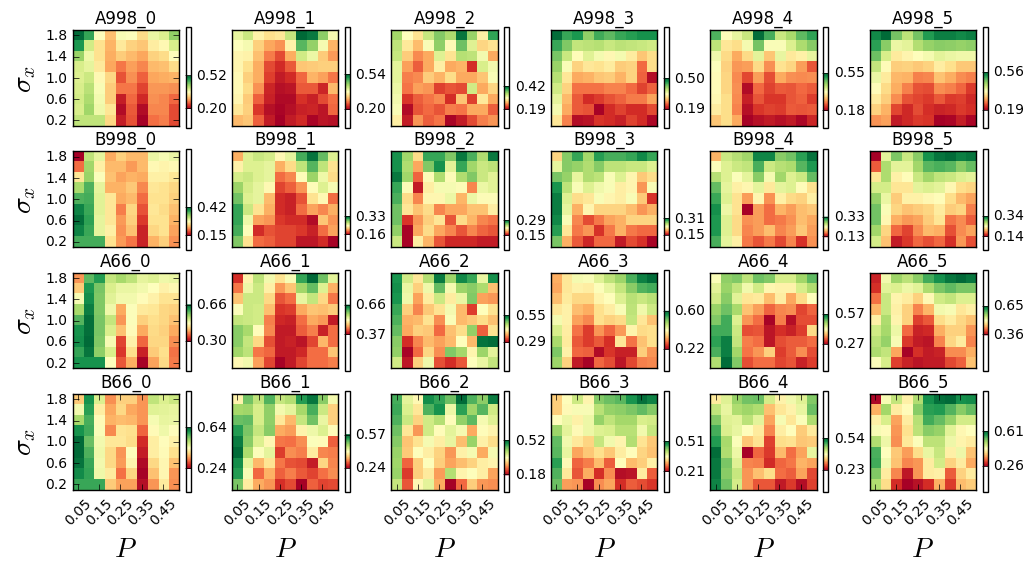

In [138]:
h, typ = 1, 'uN_%i_local'%1
params = Te.findParameters(dir_+ '/%s/FC_998'%typ)
params['sigma2x'] = [p[:-1] for p in params['sigma2x']]
Td.mapMatrices(*align(SCO_nnL, h), lxy=[params[params.keys()[i]] for i in [0,1]], **kwa)

# Sauvegarde

In [6]:
for h in range(3):
    for i in range(6):
        for t, td in zip([0,2,1,3], ['A998','B998','A66','B66']):
            Te.array2data(CO_nG[h][i][t],   '/home/golos/Main/Simulations/TcHrfDowFc/CO/CFSS_%s_CFSE_P_sx_SC%i_h%i_NormGlobal.npy'%(td,i,h))
            Te.array2data(CO_nL[h][i][t],   '/home/golos/Main/Simulations/TcHrfDowFc/CO/CFSS_%s_CFSE_P_sx_SC%i_h%i_NormLocal.npy'%(td,i,h))
            Te.array2data(CO_nnG[h][i][t],  '/home/golos/Main/Simulations/TcHrfDowFc/CO/CFSS_%s_CFSE_P_sx_SC%i_h%i_NonNormGlobal.npy'%(td,i,h))
            Te.array2data(CO_nnL[h][i][t],  '/home/golos/Main/Simulations/TcHrfDowFc/CO/CFSS_%s_CFSE_P_sx_SC%i_h%i_NonNormLocal.npy'%(td,i,h))
            Te.array2data(SCO_nG[h][i][t],  '/home/golos/Main/Simulations/TcHrfDowFc/CO/CFSS_%s_CS_P_sx_SC%i_h%i_NormGlobal.npy'%(td,i,h))
            Te.array2data(SCO_nL[h][i][t],  '/home/golos/Main/Simulations/TcHrfDowFc/CO/CFSS_%s_CS_P_sx_SC%i_h%i_NormLocal.npy'%(td,i,h))
            Te.array2data(SCO_nnG[h][i][t], '/home/golos/Main/Simulations/TcHrfDowFc/CO/CFSS_%s_CS_P_sx_SC%i_h%i_NonNormGlobal.npy'%(td,i,h))
            Te.array2data(SCO_nnL[h][i][t], '/home/golos/Main/Simulations/TcHrfDowFc/CO/CFSS_%s_CS_P_sx_SC%i_h%i_NonNormLocal.npy'%(td,i,h))

## Database

In [5]:
des0 = 'Corrélations entre les Connectivités Fonctionnelles Spatiales Empiriques (CFSE), '
des1a= 'basées sur l\'activité sur %s noeuds, '
des1b= 'basées sur le BOLD sur %s noeuds, '
des2a= 'avec les Simulées (CFSS), '
des2b= 'avec les Connectivités Structurelles (Connectomes CS), '
des3 = 'pour un connectome %s, sur un espace de paramètres %s.'
for h in range(3):
    for i in range(6):
        for td in ['A998','B998','A66','B66']:
            for coN, coD in zip(['NormGlobal', 'NormLocal', 'NonNormGlobal', 'NonNormLocal'],
                                [['normalisé','global'], ['normalisé','local'], ['non normalisé','global'], ['non normalisé','local']]):

                des1 = (('A' in td) * des1a + ('B' in td) * des1b) %td[1:]
                db.add(name= 'CO_CFSS_%s_CFSE_P_sx_SC%i_h%i_%s' %(td,i,h,coN), 
                       adress= dir_+ '/CO/CFSS_%s_CFSE_P_sx_SC%i_h%i_%s.npy' %(td,i,h,coN),
                       projet= 'Hagmann',
                       type= 'Analyses, Corrélations',
                       description= des0 +des1 +des2a +des3 %(coD[0], coD[1]))

                db.add(name= 'CO_CFSS_%s_CS_P_sx_SC%i_h%i_%s' %(td,i,h,coN), 
                       adress= dir_+ '/CO/CFSS_%s_CS_P_sx_SC%i_h%i_%s.npy' %(td,i,h,coN),
                       projet= 'Hagmann',
                       type= 'Analyses, Corrélations',
                       description= des0 +des1 +des2b +des3 %(coD[0], coD[1]))

In [7]:
db.save()

Saved here : /home/golos/Main/Tools/DB.npy (3.62 MB, 19843 items)


In [4]:
db.size(name=['CFSS','h0','SC1','998'])

'12.19 KB for 16 items'

# Connectomes

* Sans prendre en compte la diagonale
* $N=998$
* $\forall$ les sujets et le spécial

In [59]:
corrCS, cocoCS, titsCS = [], [], []
for i in range(6):
    corrCS.append( abs(Tf.matricesCorrelation(CS['SC_Hag_998_%i'%i], CFSE['FC_Hag_998_%i'%i], avg=False, finite=True, diag=False)) )
    cocoCS.append( Tf.triSupPearsonCor(CS['SC_Hag_998_%i'%i], CFSE['FC_Hag_998_%i'%i], finite=True) )
    titsCS.append( '%i (%.2f)' %(i, cocoCS[i]) )

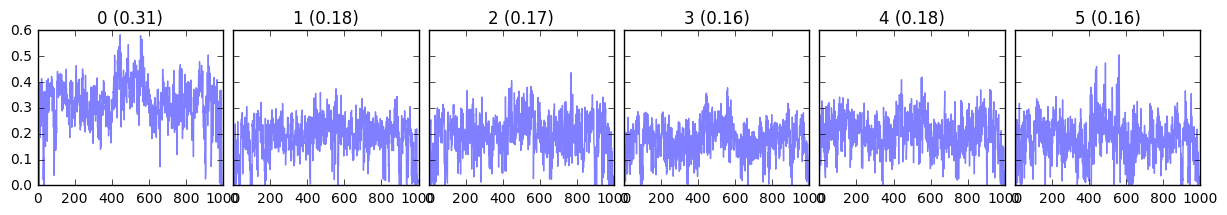

In [60]:
Td.mapMatrices(corrCS, lTitl=titsCS, alpha=0.5, disp='plot', lign=1, fs=(15,2), grid='axesgrid')

# Comparaison avec $CS$

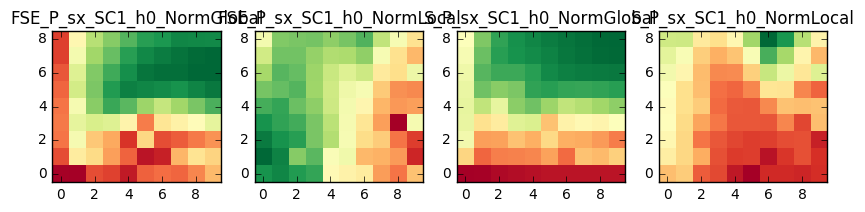

In [10]:
db.display(name=['CFSS','h0','SC1','_Norm','A998'], dispOpt=dict(fs=(10,2), cmap='RdYlGn', lign=1, origin='lower', interpolation='nearest'))

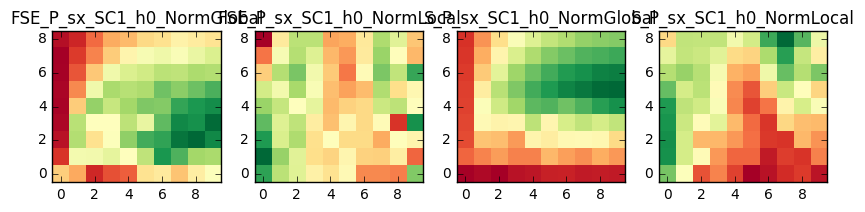

In [11]:
db.display(name=['CFSS','h0','SC1','_Norm','B998'], dispOpt=dict(fs=(10,2), cmap='RdYlGn', lign=1, origin='lower', interpolation='nearest'))

In [64]:
cocoCFS_u, cocoCFS_N = [], []
for i in range(6):
    cocoCFS_N.append(max(CO_nG[i].max(), CO_nL[i].max()))
    cocoCFS_u.append(max(CO_nnG[i].max(), CO_nnL[i].max()))

# Mauvaises CO

In [157]:
ind = Tm.triHemi(empty((998,998)), ind=True, h=1)
a = Te.data2array('/home/golos/Main/Connectomes/Hagmann/FC_D_998_1.npy')
b = db.load(name=['FC_','B998','SC1_P_sx','4.0','0.6']).values()[0]
print corrcoef(a.take(ind), b.take(ind))[0,1]
print Tm.triSupPearsonCor(a,b)
print corrcoef(where(a.take(ind)<0,0,a.take(ind)), where(b.take(ind)<0,0,b.take(ind)))[0,1]

7.6 MB for 1 items
0.187667642527
0.130280543293
0.251553250441


In [158]:
L = len(a.take(ind)) /2
am = (a.take(ind)[:L] + a.take(ind)[L:]) /2.
bm = (b.take(ind)[:L] + b.take(ind)[L:]) /2.
print corrcoef(am, bm)[0,1]
print corrcoef(where(am<0,0,am), where(bm<0,0,bm))[0,1]

0.247572739524
0.322917556675


In [159]:
sl1 = slice(0,499), slice(0,499), slice(997,498,-1), slice(997,498,-1)
def meanHemisph(FC,sli):
    return (FC[sli[0:2]] + FC[sli[2:4]]) *.5
mha, mhb = meanHemisph(a, sl1), meanHemisph(b, sl1)
print Tm.triSupPearsonCor(mha, mhb) # trisup du trisup !!!!!!!!!!!
print Tm.triSupPearsonCor(where(mha<0,0,mha), where(mhb<0,0,mhb)) # trisup du trisup !!!!!!!!!!!

0.248343592467
0.325264936731


# Trier

## $CFS_S$ / ${CFS_E}$

* Pour $CS_0$, $P$ et $\sigma_x$
* Basé sur l'activité des noeuds ($CFS_{sim}^{act.})$

In [71]:
cNam = DB.commonString(CFSS.keys(), fileType=False); print cNam
add = db.find(name=['SC0','P_sx','FC_A998'], subk='adress').values()[0]
params = Te.findParameters(add[:add.rfind('/')]); print params

['SC0_P_sx_FC_A998_P_', '_sigma2x_', '']
{'P': ['0.20', '0.40', '0.60', '0.80', '1.00', '1.20', '1.40', '1.60', '1.80', '2.00', '2.20', '2.40', '2.60', '2.80', '3.00', '3.20', '3.40', '3.60', '3.80', '4.00'], 'sigma2x': ['0.00', '0.12', '0.24', '0.36', '0.48', '0.60', '0.72', '0.84', '0.96']}


In [40]:
iCFSS = CFSS['%s'.join(cNam) %(params['P'][-1], params['sigma2x'][-2])]

In [44]:
corrCFS, titsCFS = [], []
for i in range(6):
    corrCFS.append( abs(Tf.matricesCorrelation(iCFSS, CFSE['FC_Hag_998_%i'%i], avg=False, finite=True, diag=False)) )
    titsCFS.append( '%i (%.2f)' %(i, Tf.triSupPearsonCor(iCFSS, CFSE['FC_Hag_998_%i'%i], finite=True)) )

## Affichage

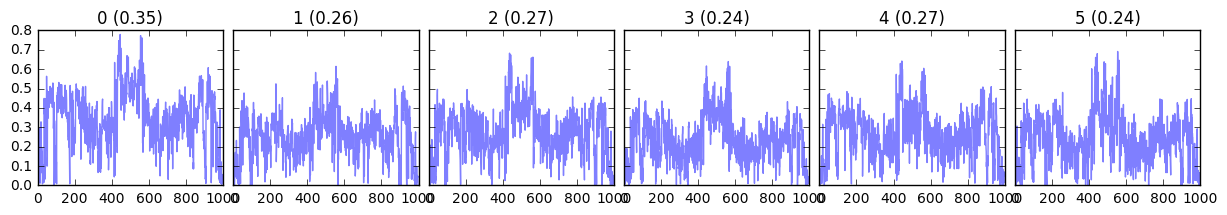

In [45]:
Td.mapMatrices(corrCFS, lTitl=titsCFS, alpha=0.5, disp='plot', lign=1, fs=(15,2), grid='axesgrid')

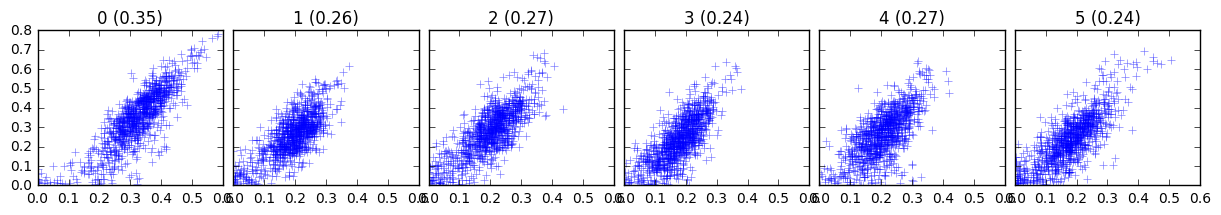

In [68]:
Td.mapMatrices(corrCFS, x=corrCS, lTitl=titsCFS, alpha=0.5, disp='plot', lign=1, fs=(15,2), grid='axesgrid', linestyle='', marker='+')

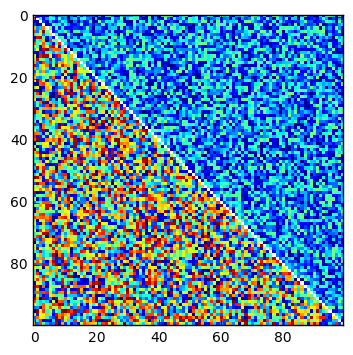

In [54]:
imshow(Tm.TwoTri(rand(100,100), 2*rand(100,100)), interpolation='nearest');